In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/daily-temperature-of-major-cities/city_temperature.csv


In [2]:
import pandas as pd
import numpy as np

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
dataset = pd.read_csv('/kaggle/input/daily-temperature-of-major-cities/city_temperature.csv')

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
temp = [dataset]

In [6]:
dataset.describe()

,Month,Day,Year,AvgTemperature
count,2.906327e+06,2.906327e+06,2.906327e+06,2.906327e+06
mean,6.469163e+00,1.571682e+01,2.006624e+03,5.600492e+01
std,3.456489e+00,8.800534e+00,2.338226e+01,3.212359e+01
min,1.000000e+00,0.000000e+00,2.000000e+02,-9.900000e+01
25%,3.000000e+00,8.000000e+00,2.001000e+03,4.580000e+01
50%,6.000000e+00,1.600000e+01,2.007000e+03,6.250000e+01
75%,9.000000e+00,2.300000e+01,2.013000e+03,7.550000e+01
max,1.200000e+01,3.100000e+01,2.020000e+03,1.100000e+02


In [7]:
dataset

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9
...,...,...,...,...,...,...,...,...
2906322,North America,US,Additional Territories,San Juan Puerto Rico,7,27,2013,82.4
2906323,North America,US,Additional Territories,San Juan Puerto Rico,7,28,2013,81.6
2906324,North America,US,Additional Territories,San Juan Puerto Rico,7,29,2013,84.2
2906325,North America,US,Additional Territories,San Juan Puerto Rico,7,30,2013,83.8


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906327 entries, 0 to 2906326
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Region          object 
 1   Country         object 
 2   State           object 
 3   City            object 
 4   Month           int64  
 5   Day             int64  
 6   Year            int64  
 7   AvgTemperature  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 177.4+ MB


In [9]:
dataset.tail(15)

,Region,Country,State,City,Month,Day,Year,AvgTemperature
2906312,North America,US,Additional Territories,San Juan Puerto Rico,7,17,2013,83.4
2906313,North America,US,Additional Territories,San Juan Puerto Rico,7,18,2013,78.6
2906314,North America,US,Additional Territories,San Juan Puerto Rico,7,19,2013,81.6
2906315,North America,US,Additional Territories,San Juan Puerto Rico,7,20,2013,83.4
2906316,North America,US,Additional Territories,San Juan Puerto Rico,7,21,2013,82.8
2906317,North America,US,Additional Territories,San Juan Puerto Rico,7,22,2013,80.9
2906318,North America,US,Additional Territories,San Juan Puerto Rico,7,23,2013,83.1
2906319,North America,US,Additional Territories,San Juan Puerto Rico,7,24,2013,83.2
2906320,North America,US,Additional Territories,San Juan Puerto Rico,7,25,2013,83.7
2906321,North America,US,Additional Territories,San Juan Puerto Rico,7,26,2013,82.4


In [10]:
dataset.isnull().sum()

Region                  0
Country                 0
State             1450990
City                    0
Month                   0
Day                     0
Year                    0
AvgTemperature          0
dtype: int64

* Most of the missing data come from the variable State
* We then must drop the variable since 50% of it has missing information

In [11]:
dataset = dataset.drop('State', axis=1)

In [12]:
dataset.isnull().sum()

Region            0
Country           0
City              0
Month             0
Day               0
Year              0
AvgTemperature    0
dtype: int64

In [13]:
dataset['Region'].value_counts()

North America                        1556681
Europe                                381990
Asia                                  316663
Africa                                251118
South/Central America & Carribean     219530
Middle East                           124749
Australia/South Pacific                55596
Name: Region, dtype: int64

In [14]:
temp=[dataset]

In [15]:
dataset['AvgTemperature']= (dataset.AvgTemperature-32)*5/9

* Changing temperature from farenheit to celsisus 

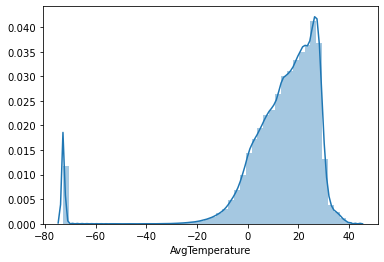

In [16]:
sns.distplot(dataset['AvgTemperature'])

* Average Temperature is left skewed 

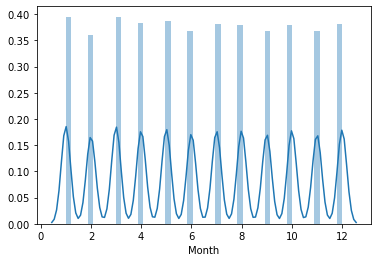

In [17]:
sns.distplot(dataset['Month'])

* This means all the months have almost equal number of entries

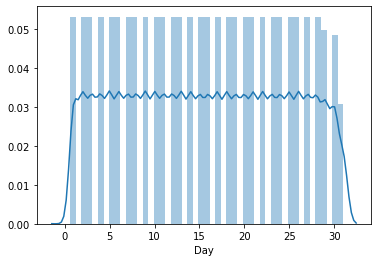

In [18]:
sns.distplot(dataset['Day'])

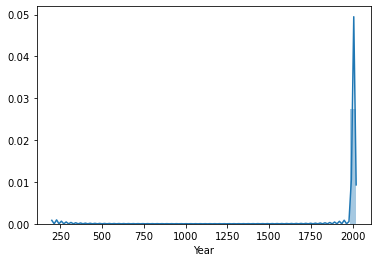

In [19]:
sns.distplot(dataset['Year'])

* This shows year is left skewed and we may also have some outliers

In [20]:
dataset=dataset[dataset.Year>1990]

In [21]:
dataset.shape

(2905887, 7)

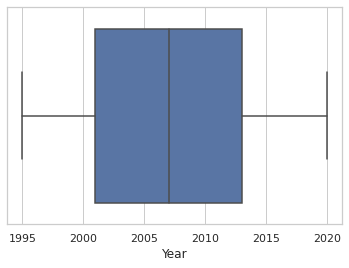

In [22]:
sns.set(style="whitegrid")
sns.boxplot(x=dataset['Year'])

* We have dropped the rows with the year values less than 1990 as they were no use for us. 

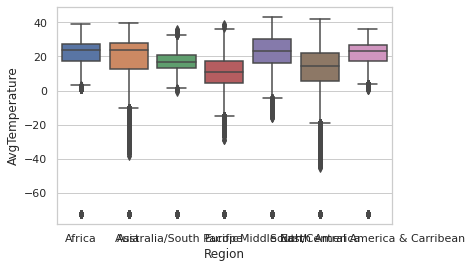

In [23]:
sns.boxplot(x=dataset['Region'], y=dataset['AvgTemperature'], data=dataset)

* We have so many outliers in the region feature

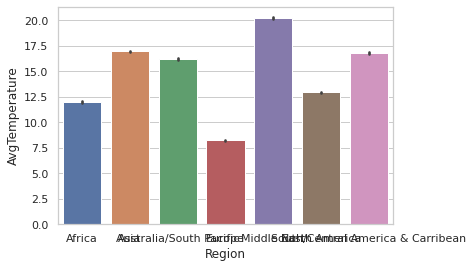

In [24]:
sns.set(style="whitegrid")

chart = sns.barplot(x=dataset['Region'], y=dataset['AvgTemperature'], data=dataset)

* Middle East seems to have the highest average temperature in the region while Europe has the lowest 

In [25]:
dataset['Region'].value_counts()

North America                        1556652
Europe                                381695
Asia                                  316663
Africa                                251002
South/Central America & Carribean     219530
Middle East                           124749
Australia/South Pacific                55596
Name: Region, dtype: int64

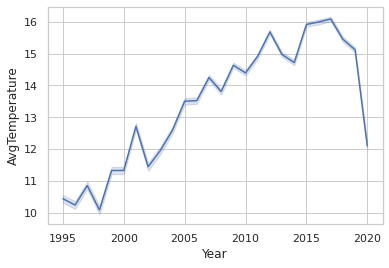

In [26]:
ax = sns.lineplot(x=dataset['Year'], y=dataset['AvgTemperature'], data=dataset)

* The trends show that the average temperature has sharply decreased roughly after 2017. This is because major area lies in the northern hemisphere presently only the initial months of the year 2020 have been recorded. Its affecting the overall trend

In [27]:
dataset2 = dataset[dataset.Year<2020]

* We have removed the entries for the year 2020 because the data was incomplete for that year and it would affect our overall trend and would have affected the performance of our model. 

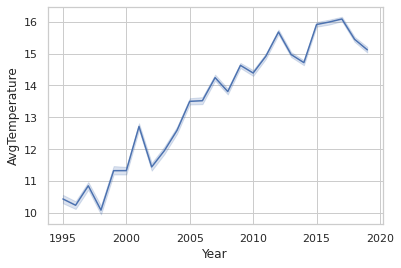

In [28]:
ax = sns.lineplot(x=dataset2['Year'], y=dataset2['AvgTemperature'], data=dataset2)

* Now it looks better. The shap decrease of the global average temperature has been removed

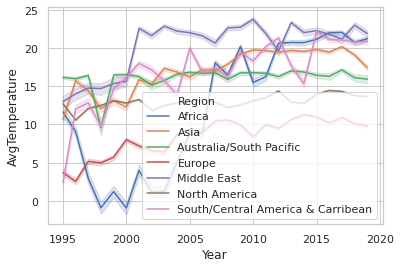

In [29]:
region = dataset['Region']
ax = sns.lineplot(x=dataset2['Year'], y=dataset2['AvgTemperature'], hue=region, legend="full", data=dataset2)

* Africa is showing high fluctuations in temperature while north america is having pretty stable changes overtime

In [30]:
dataset['Weather_type']=dataset['AvgTemperature']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
temp = [dataset]

In [32]:
for data in temp:
    data.loc[dataset['Weather_type']<=12, 'Weather_type']=0
    data.loc[(dataset['Weather_type']>12) & (dataset['Weather_type']<=18), 'Weather_type']=1,
    data.loc[(dataset['Weather_type']>18) & (dataset['Weather_type']<=26), 'Weather_type']=2,
    data.loc[(dataset['Weather_type']>26) & (dataset['Weather_type']<=35), 'Weather_type']=3,
    data.loc[(dataset['Weather_type']>35), 'Weather_type']=4

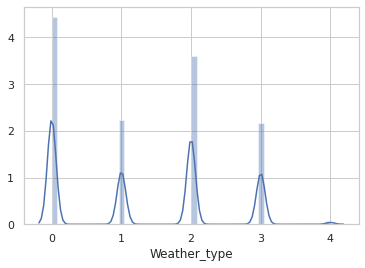

In [33]:
sns.distplot(dataset['Weather_type'])

* It shows that very less places have temperatures higher than 35 degrees celsius

In [34]:
temp = [dataset]

In [35]:
dataset.head()

,Region,Country,City,Month,Day,Year,AvgTemperature,Weather_type
0,Africa,Algeria,Algiers,1,1,1995,17.888889,1.0
1,Africa,Algeria,Algiers,1,2,1995,9.666667,0.0
2,Africa,Algeria,Algiers,1,3,1995,9.333333,0.0
3,Africa,Algeria,Algiers,1,4,1995,8.000000,0.0
4,Africa,Algeria,Algiers,1,5,1995,8.833333,0.0


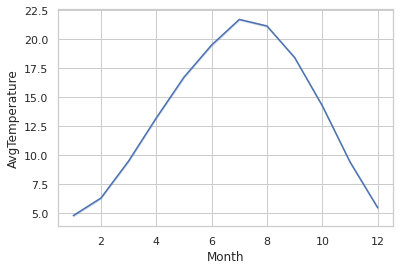

In [36]:
sns.lineplot(x=dataset['Month'], y=dataset['AvgTemperature'], data=dataset)

* The average temperature on global level peaks somewhere between June and August 

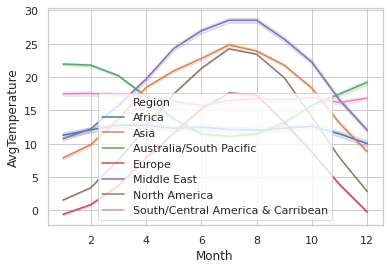

In [37]:
sns.lineplot(x=dataset['Month'], y=dataset['AvgTemperature'], hue=dataset['Region'], legend="full", data=dataset)

In [38]:
dataset.head()

,Region,Country,City,Month,Day,Year,AvgTemperature,Weather_type
0,Africa,Algeria,Algiers,1,1,1995,17.888889,1.0
1,Africa,Algeria,Algiers,1,2,1995,9.666667,0.0
2,Africa,Algeria,Algiers,1,3,1995,9.333333,0.0
3,Africa,Algeria,Algiers,1,4,1995,8.000000,0.0
4,Africa,Algeria,Algiers,1,5,1995,8.833333,0.0


In [39]:
Region_mapping = {"Africa":4, "Europe":2, "Asia":3, "North America":1, "Australia/South Pacific":7, "Middle East":6, "South/Central America & Carribean":5}
for data in temp:
    data['Region'] = data['Region'].map(Region_mapping)

In [40]:
#importing function
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['Country'] = le.fit_transform(dataset['Country'])

In [41]:
dataset.head()

,Region,Country,City,Month,Day,Year,AvgTemperature,Weather_type
0,4,1,Algiers,1,1,1995,17.888889,1.0
1,4,1,Algiers,1,2,1995,9.666667,0.0
2,4,1,Algiers,1,3,1995,9.333333,0.0
3,4,1,Algiers,1,4,1995,8.000000,0.0
4,4,1,Algiers,1,5,1995,8.833333,0.0


In [42]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['City'] = le.fit_transform(dataset['City'])

In [43]:
dataset.head()

,Region,Country,City,Month,Day,Year,AvgTemperature,Weather_type
0,4,1,7,1,1,1995,17.888889,1.0
1,4,1,7,1,2,1995,9.666667,0.0
2,4,1,7,1,3,1995,9.333333,0.0
3,4,1,7,1,4,1995,8.000000,0.0
4,4,1,7,1,5,1995,8.833333,0.0
